<a href="https://colab.research.google.com/github/Pranav0514/Internship_Projects/blob/main/CodSoft_Task_No_4_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sales_predict = pd.read_csv('/content/drive/MyDrive/Dataset_csv/advertising.csv')
sales_predict.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [ ]:
sales_predict.shape

(200, 4)

In [ ]:
sales_predict.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


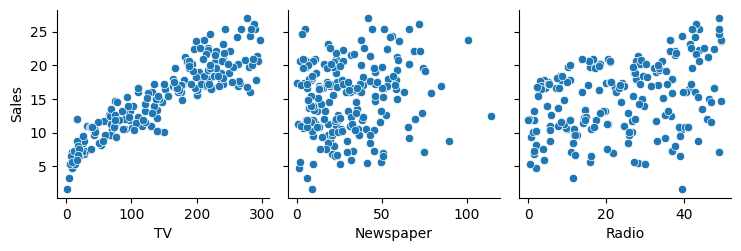

In [ ]:
#PairPlot Impementing of each Sales.
sns.pairplot(sales_predict, x_vars=['TV','Newspaper','Radio'], y_vars='Sales',kind='scatter')
plt.show()

<Axes: ylabel='Frequency'>

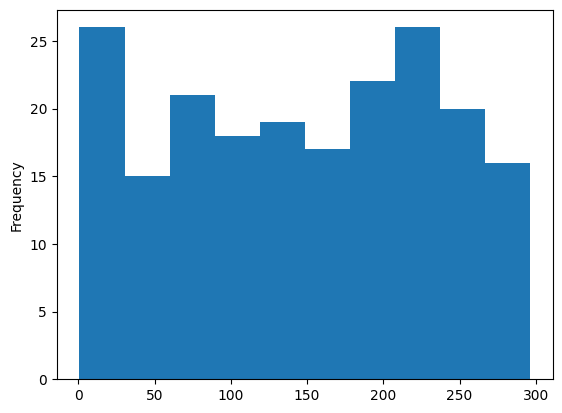

In [ ]:
#PairPlot Observations
sales_predict['TV'].plot.hist(bins=10)

<Axes: ylabel='Frequency'>

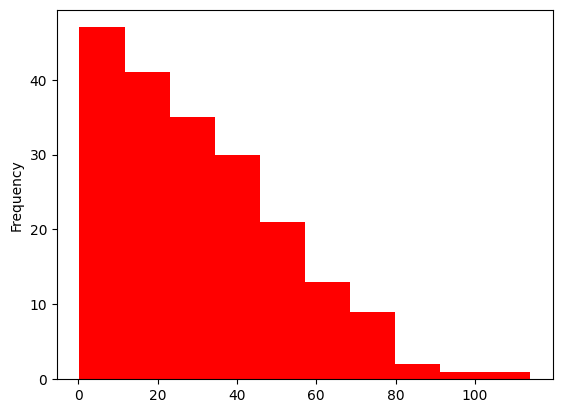

In [ ]:
sales_predict['Newspaper'].plot.hist(bins=10, color='red', xlabel='Newspaper')

<Axes: ylabel='Frequency'>

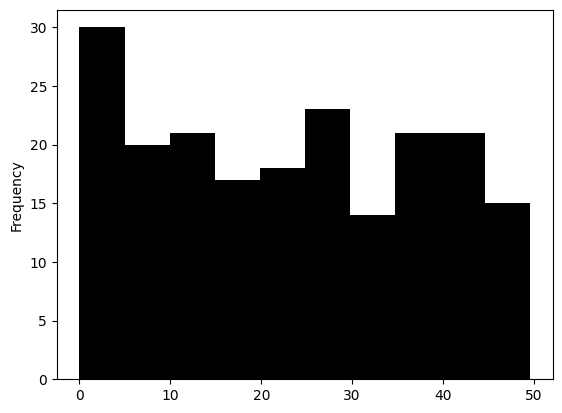

In [ ]:
sales_predict['Radio'].plot.hist(bins=10, color='black', xlabel='Radio')

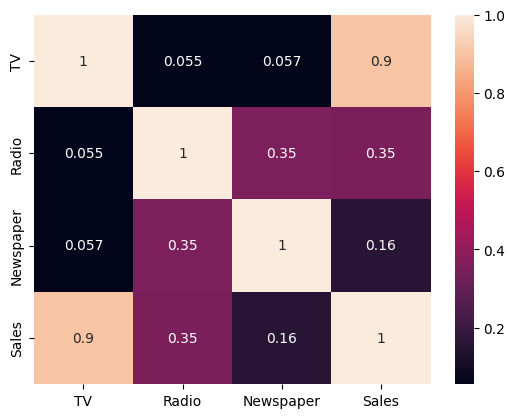

In [ ]:
#Observations using a Histogram Map.
sns.heatmap(sales_predict.corr(),annot=True)
plt.show()

Training Our Dataset Using Linear Regression as it is mainly related with 'TV' Sales

In [ ]:
#Linear Regression Model Training
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(sales_predict[['TV']],sales_predict[['Sales']], test_size=0.5, random_state=0)

In [ ]:
print(X_train)

        TV
158   11.7
191   75.5
50   199.8
0    230.1
94   107.4
..     ...
67   139.3
192   17.2
117   76.4
47   239.9
172   19.6

[100 rows x 1 columns]


In [ ]:
print(Y_train)

     Sales
158    7.3
191   11.9
50    16.4
0     22.1
94    11.5
..     ...
67    13.4
192    5.9
117    9.4
47    23.2
172    7.6

[100 rows x 1 columns]


In [ ]:
print(X_test)

        TV
18    69.2
170   50.0
107   90.4
98   289.7
177  170.2
..     ...
178  276.7
175  276.9
126    7.8
93   250.9
112  175.7

[100 rows x 1 columns]


In [ ]:
print(Y_test)

     Sales
18    11.3
170    8.4
107   12.0
98    25.4
177   16.7
..     ...
178   16.8
175   27.0
126    6.6
93    22.2
112   17.1

[100 rows x 1 columns]


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [ ]:
res = model.predict(X_test)
print(res)

[[10.85538585]
 [ 9.77979849]
 [12.04301357]
 [23.20783449]
 [16.51342355]
 [10.12712357]
 [ 7.46616525]
 [20.4292338 ]
 [ 8.31206989]
 [18.04837635]
 [21.61686152]
 [11.86374901]
 [15.75154917]
 [17.49937863]
 [11.25873111]
 [13.71241479]
 [21.85774827]
 [ 7.01800385]
 [11.16349681]
 [18.93349512]
 [23.09019212]
 [14.83842031]
 [16.78792241]
 [14.3566468 ]
 [ 9.9758691 ]
 [13.8748733 ]
 [16.25573074]
 [18.46292565]
 [19.52730898]
 [ 8.38489612]
 [10.77695761]
 [18.12120258]
 [22.70365292]
 [20.51886608]
 [ 7.71825604]
 [ 8.026367  ]
 [10.31759217]
 [17.10723741]
 [10.81056971]
 [ 8.37929411]
 [ 9.04593419]
 [ 8.74342524]
 [14.98407277]
 [18.72061846]
 [19.04553547]
 [12.73206172]
 [ 7.46056323]
 [ 7.92553069]
 [14.02052575]
 [12.83850005]
 [13.12980497]
 [19.83541994]
 [21.1967102 ]
 [17.33692013]
 [ 9.48289156]
 [10.46884664]
 [23.38709905]
 [16.64226995]
 [18.32287521]
 [ 7.387737  ]
 [21.8353402 ]
 [18.04837635]
 [19.21919801]
 [15.23056154]
 [16.57504574]
 [19.17438187]
 [21.69528

In [ ]:
model.coef_

array([[0.05602018]])

In [ ]:
model.intercept_

array([6.97878972])

In [ ]:
0.05602018* 69 + 6.97878972

10.844182140000001

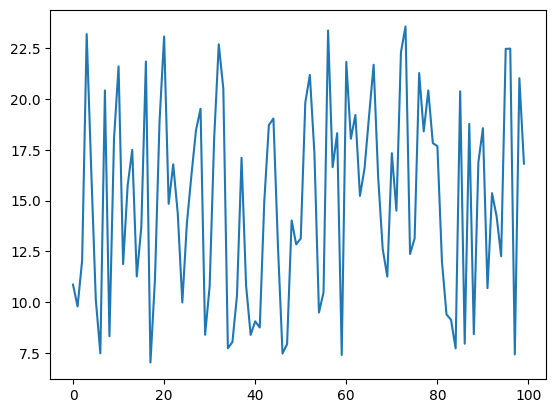

In [ ]:
plt.plot(res)

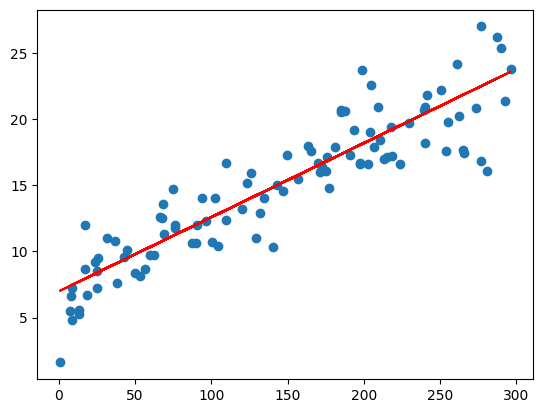

In [ ]:
plt.scatter(X_test, Y_test)
plt.plot(X_test, 6.97878972 + 0.05602018 * X_test,'r')
plt.show()

The Plot which has been generated is able to sucessfully predict the sales using advertising as models Dataset.